In [1]:
import pandas as pd
from io import StringIO
from sklearn.neighbors import NearestNeighbors

# Load the dataset from a CSV-formatted string (in practice, use pd.read_csv on a file)
data = """WaveID,City,Magnitude,Frequency,Duration,Damage,Deaths,HelpType,HelpScale
1,Tokyo,7.8,1.0,45,1000,150,Medical,9
2,SanFrancisco,6.9,0.8,30,500,50,Rescue,7
3,Jakarta,7.0,1.2,40,800,100,Shelter,8
4,Santiago,6.5,0.5,20,200,20,Rescue,5
5,LosAngeles,5.5,2.0,15,50,5,Medical,3
6,Beijing,6.8,1.5,35,300,10,Engineering,4
7,Tehran,7.2,0.9,38,600,80,Medical,8
8,Istanbul,7.4,1.1,42,700,90,Rescue,8
9,Manila,6.2,1.3,25,150,30,Medical,4
10,Delhi,5.8,0.7,18,80,10,Engineering,3
"""
df = pd.read_csv(StringIO(data))

# Select features for similarity: Magnitude, Frequency, Duration
features = df[['Magnitude','Frequency','Duration']].values

# Fit KNN model (Euclidean distance)
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(features)

# Define the new seismic event (example inputs)
# In practice, these would come from sensors or user input
new_event = pd.DataFrame([[7.6, 0.9, 28]], columns=['Magnitude','Frequency','Duration'])

# Find the nearest past event
distances, indices = knn.kneighbors(new_event)
idx = indices[0][0]
similar_event = df.iloc[idx]

# Output the most similar event's details
print(f"Most similar past event: WaveID {similar_event.WaveID} in {similar_event.City}")
print(f"  Magnitude {similar_event.Magnitude}, Duration {similar_event.Duration}s")
print(f"  -> Past Impact: Damage={similar_event.Damage}, Deaths={similar_event.Deaths}")
print(f"  -> Help Needed: {similar_event.HelpType} (scale {similar_event.HelpScale})")

# Suggest optimal steps based on the past event's required aid
help_type = similar_event.HelpType
suggestions = []
if help_type == 'Medical':
    suggestions.append("Deploy emergency medical teams, supplies, and hospitals immediately.")
elif help_type == 'Rescue':
    suggestions.append("Send search-and-rescue crews to locate survivors and clear rubble.")
elif help_type == 'Shelter':
    suggestions.append("Set up temporary shelters, food, and water for displaced people.")
elif help_type == 'Engineering':
    suggestions.append("Inspect buildings and infrastructure; mobilize structural engineers for repairs.")
else:
    suggestions.append("Assess needs and coordinate appropriate relief agencies.")

print("\nSuggested response steps based on past experience:")
for step in suggestions:
    print(f"- {step}")


Most similar past event: WaveID 2 in SanFrancisco
  Magnitude 6.9, Duration 30s
  -> Past Impact: Damage=500, Deaths=50
  -> Help Needed: Rescue (scale 7)

Suggested response steps based on past experience:
- Send search-and-rescue crews to locate survivors and clear rubble.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Load the dataset from the CSV file
df = pd.read_csv("/content/seismic_events.csv")

# Use only numeric features for similarity comparison
feature_cols = ['Magnitude', 'Frequency', 'Duration']
X = df[feature_cols].values

# Build KNN model
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X)

# === HARD-CODED INPUT for a new seismic wave ===
# Example: Magnitude=7.5, Frequency=1.0 Hz, Duration=43 seconds
new_wave = [[7.5, 1.0, 43]]

# Find the most similar past seismic wave
distance, index = knn.kneighbors(new_wave)
similar_wave = df.iloc[index[0][0]]

# Display results
print(f"🔎 Most similar past event: WaveID {similar_wave.WaveID} in {similar_wave.City}")
print(f"  ➤ Magnitude: {similar_wave.Magnitude}")
print(f"  ➤ Duration: {similar_wave.Duration}s")
print(f"  ➤ Frequency: {similar_wave.Frequency} Hz")
print(f"\n🧾 Past Impact:")
print(f"  ➤ Damage: ${similar_wave.Damage} million")
print(f"  ➤ Deaths: {similar_wave.Deaths}")
print(f"  ➤ Help Needed: {similar_wave.HelpType} (Scale {similar_wave.HelpScale})")

# Suggest response actions
help_type = similar_wave.HelpType
suggestions = {
    'Medical': "Deploy medical teams and set up emergency care facilities.",
    'Rescue': "Send search and rescue operations to locate and help survivors.",
    'Shelter': "Prepare emergency shelters, food, and water for displaced citizens.",
    'Engineering': "Inspect infrastructure and stabilize damaged buildings."
}

print("\n✅ Suggested Response:")
print(f"  ➤ {suggestions.get(help_type, 'Assess and deploy resources as needed.')}")


🔎 Most similar past event: WaveID 11 in MexicoCity
  ➤ Magnitude: 7.6
  ➤ Duration: 44s
  ➤ Frequency: 1.0 Hz

🧾 Past Impact:
  ➤ Damage: $950 million
  ➤ Deaths: 140
  ➤ Help Needed: Rescue (Scale 9)

✅ Suggested Response:
  ➤ Send search and rescue operations to locate and help survivors.


In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import requests

# === API SETUP ===
GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

# === Load dataset ===
df = pd.read_csv("seismic_events.csv")  # CSV file with your earthquake data

# === Prepare features ===
feature_cols = ['Magnitude', 'Frequency', 'Duration']
X = df[feature_cols].values

# === Train KNN model ===
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X)

# === HARD-CODED input seismic wave ===
# Example: Magnitude=7.5, Frequency=1.0 Hz, Duration=43 seconds
new_wave = [[7.5, 1.0, 43]]

# === Find nearest past event ===
_, index = knn.kneighbors(new_wave)
similar_wave = df.iloc[index[0][0]]

# === Print similar wave info ===
print(f"🔎 Found similar past earthquake:")
print(f"  ➤ Wave ID: {similar_wave.WaveID}")
print(f"  ➤ City: {similar_wave.City}")
print(f"  ➤ Magnitude: {similar_wave.Magnitude}")
print(f"  ➤ Frequency: {similar_wave.Frequency} Hz")
print(f"  ➤ Duration: {similar_wave.Duration} seconds")
print(f"  ➤ Location: {similar_wave.get('Location', 'Unknown')}")
print(f"  ➤ Date: {similar_wave.get('Date', 'Unknown')}")
print("\n🧾 Past Damage Info:")
print(f"  ➤ Estimated Damage: ${similar_wave.Damage} million")
print(f"  ➤ Deaths: {similar_wave.Deaths}")
print(f"  ➤ Help Needed: {similar_wave.HelpType} (Scale {similar_wave.HelpScale})")

# === Prepare prompt for LLM ===
prompt = (
    f"A seismic wave similar to past event in {similar_wave.City} "
    f"(Magnitude {similar_wave.Magnitude}, Duration {similar_wave.Duration}s) "
    f"caused ${similar_wave.Damage}M in damages and {similar_wave.Deaths} deaths. "
    f"The help required was '{similar_wave.HelpType}' at scale {similar_wave.HelpScale}.\n"
    f"Generate a disaster response plan suggesting optimal resource allocation, early response, and recovery actions."
)

# === Send prompt to Groq Llama3 API ===
headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
}

data = {
    "model": "llama3-70b-8192",
    "messages": [
        {"role": "user", "content": prompt}
    ],
    "temperature": 0.7
}

response = requests.post(GROQ_API_URL, headers=headers, json=data)

# === Handle API response ===
if response.status_code == 200:
    ai_response = response.json()['choices'][0]['message']['content']
    print("\n🤖 Dynamic Disaster Response Plan from Llama 3:")
    print(ai_response)
else:
    print("❌ Error contacting Groq API:", response.text)


🔎 Found similar past earthquake:
  ➤ Wave ID: 11
  ➤ City: MexicoCity
  ➤ Magnitude: 7.6
  ➤ Frequency: 1.0 Hz
  ➤ Duration: 44 seconds
  ➤ Location: Unknown
  ➤ Date: Unknown

🧾 Past Damage Info:
  ➤ Estimated Damage: $950 million
  ➤ Deaths: 140
  ➤ Help Needed: Rescue (Scale 9)

🤖 Dynamic Disaster Response Plan from Llama 3:
**Disaster Response Plan: Seismic Wave in Mexico City**

**I. Situation Report**

* Event: Seismic wave similar to past event in Mexico City (Magnitude 7.6, Duration 44s)
* Estimated damages: $950M
* Estimated deaths: 140
* Help required: 'Rescue' at scale 9

**II. Response Objectives**

1. Minimize loss of life and injury
2. Provide timely and effective rescue operations
3. Assess and address immediate needs of affected communities
4. Restore essential services and infrastructure
5. Support long-term recovery and rebuilding efforts

**III. Resource Allocation**

A. **Rescue and Emergency Response** (Scale 9)

* Allocate 300 emergency responders, including:
	+ 1

<ipython-input-4-66bb80db1664>:37: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


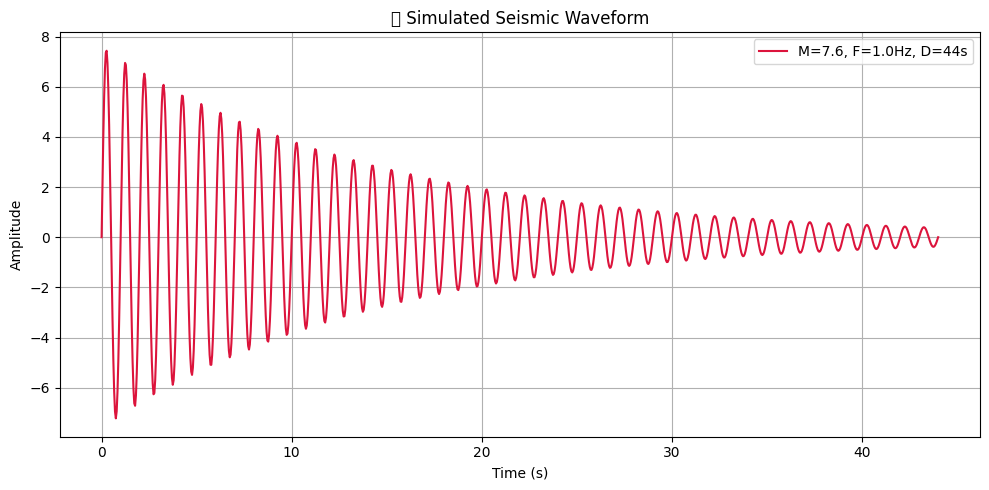

**Disaster Response Plan: Seismic Wave in Mexico City**

** Situation Overview**

* Magnitude 7.6 earthquake with a duration of 44 seconds
* Estimated damages: $950M
* Estimated fatalities: 140
* Required help: "Rescue" at scale 9

**Response Objectives**

1. Minimize loss of life and injury
2. Provide timely and effective rescue operations
3. Prevent further damage to infrastructure and property
4. Restore essential services and utilities
5. Support affected communities in recovery and rehabilitation

**Resource Allocation**

1. **Search and Rescue Teams**: 5 teams with 20 personnel each, equipped with necessary gear and equipment (e.g., excavators, generators, medical supplies)
2. **Emergency Medical Services**: 10 ambulances with paramedics and medical supplies
3. **Firefighting Units**: 5 units with 10 personnel each, equipped with firefighting gear and equipment
4. **Engineering and Technical Teams**: 2 teams with 10 personnel each, equipped with heavy machinery and equipment for 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import requests

# === API Setup ===
GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

# === Load dataset ===
df = pd.read_csv("seismic_events.csv")
feature_cols = ['Magnitude', 'Frequency', 'Duration']
X = df[feature_cols].values

# === Train KNN model ===
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X)

# === Input seismic wave ===
new_wave = [[7.5, 1.0, 43]]
_, index = knn.kneighbors(new_wave)
similar_wave = df.iloc[index[0][0]]

# === Seismic Waveform Plot ===
def plot_seismic_wave(magnitude, frequency, duration):
    t = np.linspace(0, duration, 1000)
    amplitude = magnitude * np.sin(2 * np.pi * frequency * t) * np.exp(-t / (duration / 3))

    plt.figure(figsize=(10, 5))
    plt.plot(t, amplitude, color='crimson', label=f"M={magnitude}, F={frequency}Hz, D={duration}s")
    plt.title("🌊 Simulated Seismic Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_seismic_wave(similar_wave.Magnitude, similar_wave.Frequency, similar_wave.Duration)

# === Prepare prompt for LLM ===
prompt = (
    f"A seismic wave similar to a past event in {similar_wave.City} "
    f"(Magnitude {similar_wave.Magnitude}, Duration {similar_wave.Duration}s) "
    f"caused ${similar_wave.Damage}M in damages and {similar_wave.Deaths} deaths. "
    f"The help required was '{similar_wave.HelpType}' at scale {similar_wave.HelpScale}.\n"
    f"Generate a disaster response plan suggesting optimal resource allocation, early response, and recovery actions."
)

# === Send to Groq Llama3 ===
headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
}
data = {
    "model": "llama3-70b-8192",
    "messages": [{"role": "user", "content": prompt}],
    "temperature": 0.7
}
response = requests.post(GROQ_API_URL, headers=headers, json=data)

# === Show LLM response ===
if response.status_code == 200:
    print(response.json()['choices'][0]['message']['content'])
else:
    print("❌ Error contacting Groq API:", response.text)


Computed Features → Magnitude: 7.37, Frequency: 1.00 Hz, Duration: 43.0s


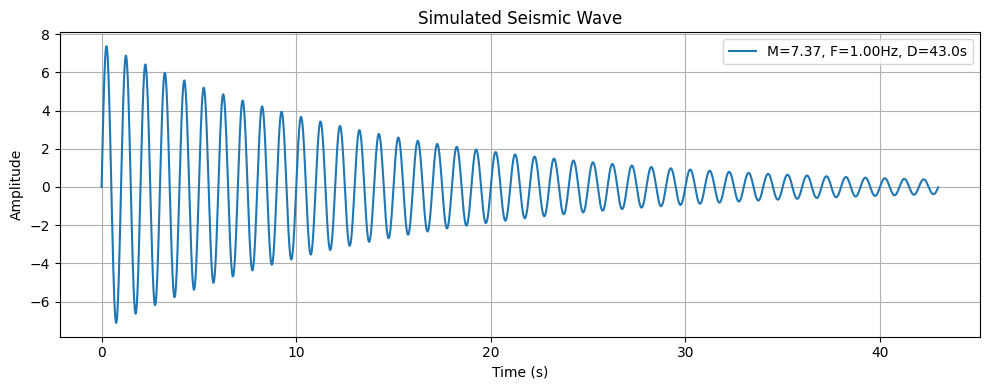


📝 Full Disaster Response Plan:
 Based on the given parameters, I've generated an optimized disaster response plan for the Istanbul earthquake event:

**Optimized Disaster Response Plan: "Istanbul Rescue 8"**

**Phase 1: Immediate Response (0-2 hours)**

* Activate emergency services and dispatch rescue teams to affected areas
* Establish communication networks and coordinate with local authorities
* Conduct rapid damage assessment and prioritize rescue efforts

**Phase 2: Search and Rescue (2-12 hours)**

* Deploy search and rescue teams with specialized equipment to locate and extract trapped individuals
* Establish medical triage centers to treat injured persons
* Provide emergency food, water, and shelter to affected populations

**Phase 3: Stabilization and Recovery (12-48 hours)**

* Restore critical infrastructure (power, water, communication)
* Deploy heavy equipment for debris removal and clearance
* Provide psychological support and counseling services to affected communities

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import requests

# === API Setup ===
GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

# === Load seismic events dataset ===
df = pd.read_csv("seismic_events.csv")
feature_cols = ['Magnitude', 'Frequency', 'Duration']
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(df[feature_cols].values)

# === Helper: simulate or load your raw waveform ===
def simulate_wave(mag, freq, dur, sample_rate=100):
    t = np.arange(0, dur, 1/sample_rate)
    # Exponentially decaying sinusoid
    amp = mag * np.sin(2*np.pi*freq*t) * np.exp(-t/(dur/3))
    return t, amp, sample_rate

# === Feature extraction from raw wave_data ===
def extract_features(wave_data, sample_rate):
    # 1) Duration (s)
    duration = len(wave_data) / sample_rate

    # 2) Magnitude ≈ peak absolute amplitude
    magnitude = np.max(np.abs(wave_data))

    # 3) Dominant frequency via FFT
    n = len(wave_data)
    freqs = np.fft.rfftfreq(n, d=1/sample_rate)
    spectrum = np.abs(np.fft.rfft(wave_data))
    dominant_freq = freqs[np.argmax(spectrum)]

    return magnitude, dominant_freq, duration

# === Demo: generate a “new” raw seismic waveform ===
t, wave_data, sr = simulate_wave(mag=7.5, freq=1.0, dur=43)

# === Compute features automatically ===
mag, freq, dur = extract_features(wave_data, sr)
print(f"Computed Features → Magnitude: {mag:.2f}, Frequency: {freq:.2f} Hz, Duration: {dur:.1f}s")

# === Plot the waveform ===
plt.figure(figsize=(10,4))
plt.plot(t, wave_data, label=f"M={mag:.2f}, F={freq:.2f}Hz, D={dur:.1f}s")
plt.title("Simulated Seismic Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Find nearest past event ===
new_feature = [[mag, freq, dur]]
_, idx = knn.kneighbors(new_feature)
sim = df.iloc[idx[0][0]]

# === Prepare prompt for LLM ===
prompt = (
    f"A seismic wave with magnitude {mag:.2f}, frequency {freq:.2f} Hz, "
    f"and duration {dur:.1f}s most closely matches an event in {sim.City} "
    f"that caused ${sim.Damage}M damage and {sim.Deaths} deaths, "
    f"requiring '{sim.HelpType}' at scale {sim.HelpScale}. "
    "Generate an optimized disaster response plan and then summarize it in 2–3 lines."
)

# === Call Groq Llama3 API ===
headers = {"Authorization": f"Bearer {GROQ_API_KEY}", "Content-Type": "application/json"}
payload = {"model":"llama3-70b-8192","messages":[{"role":"user","content":prompt}],"temperature":0.7}
res = requests.post(GROQ_API_URL, headers=headers, json=payload)

if res.status_code == 200:
    plan = res.json()['choices'][0]['message']['content']
    # Print full plan
    print("\n📝 Full Disaster Response Plan:\n", plan)
    # Then 2–3 line summary
    summary_lines = plan.strip().splitlines()[:3]
    print("\n🔖 Summary:\n" + "\n".join(summary_lines))
else:
    print("❌ API Error:", res.text)
